## 1. Load Data

In [2]:
import os
os.chdir('/content/drive/MyDrive/ML&DL_Project/Dacon/Motor_movement_classification')

In [3]:
import pandas as pd
import numpy as np

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

In [4]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


acc : 가속도계 측정 데이터

gy : 자이로스코프 측정 데이터

id별 600 time 간 동작 데이터

In [18]:
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


61개의 id 별 동작과 동작 label

Q. 운동 label은 어떤 것이 있을까?

In [33]:
pd.set_option('display.max_row', 61)

In [32]:
train_labels_df = train_labels.drop_duplicates(['label'])
train_labels_df.sort_values(by=['label'],axis=0)

,id,label,label_desc
118,118,0,Arm Band Adjustment
121,121,1,Band Pull-Down Row
76,76,2,Bicep Curl
2,2,3,Biceps Curl (band)
47,47,4,Burpee
138,138,5,Butterfly Sit-up
20,20,6,Chest Press (rack)
254,254,7,Crunch
41,41,8,Device on Table
301,301,9,Dip


26번 Non-Exercise를 제외하면 나머지는 운동하는 데이터로 보임

In [34]:
df = pd.merge(train,train_labels, on='id', how='outer')
df

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,label,label_desc
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,37,Shoulder Press (dumbbell)
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,37,Shoulder Press (dumbbell)
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,37,Shoulder Press (dumbbell)
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,37,Shoulder Press (dumbbell)
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,37,Shoulder Press (dumbbell)
...,...,...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437,2,Bicep Curl
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087,2,Bicep Curl
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125,2,Bicep Curl
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478,2,Bicep Curl


### 운동 데이터 살펴보기

### 1) Non-Exercise 동작의 흐름 살펴보기

In [39]:
df[df['label']==26]

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,label,label_desc
600,1,0,-0.211795,-0.078760,0.854627,18.231943,10.211164,7.390348,26,Non-Exercise
601,1,1,-0.256963,-0.018555,0.802172,26.524263,0.980852,7.947258,26,Non-Exercise
602,1,2,-0.257005,-0.001413,0.806032,17.569390,-3.953200,1.982548,26,Non-Exercise
603,1,3,-0.189642,-0.041282,0.827937,9.176605,-10.779063,-0.292844,26,Non-Exercise
604,1,4,-0.162570,-0.091074,0.861091,8.240664,-8.099209,-3.220456,26,Non-Exercise
...,...,...,...,...,...,...,...,...,...,...
1874395,3123,595,-0.735604,0.397373,-0.429707,-3.577383,-18.460788,-67.397904,26,Non-Exercise
1874396,3123,596,-0.791204,0.335985,-0.392082,-10.420903,-25.182192,-60.348487,26,Non-Exercise
1874397,3123,597,-0.825275,0.291954,-0.359870,-8.396905,-28.357040,-52.078199,26,Non-Exercise
1874398,3123,598,-0.857254,0.272406,-0.340558,0.119146,-29.396044,-45.053802,26,Non-Exercise


In [45]:
df[df['id']==734].head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,label,label_desc
440400,734,0,0.954901,-0.226319,0.351379,-1.154124,9.762799,0.050547,26,Non-Exercise
440401,734,1,0.822789,-0.165451,0.328751,0.302098,6.022655,-2.874051,26,Non-Exercise
440402,734,2,0.783805,-0.132583,0.304366,-9.375056,-4.227689,2.981401,26,Non-Exercise
440403,734,3,0.978161,-0.201545,0.374417,-11.658111,1.687773,2.527407,26,Non-Exercise
440404,734,4,0.988931,-0.315725,0.340186,-2.836347,8.493868,0.529529,26,Non-Exercise


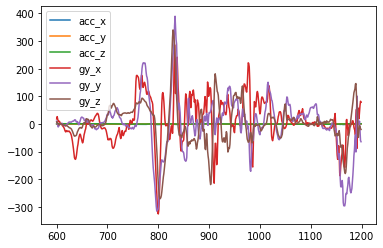

In [37]:
ex=df[df['id']==1]
ex.iloc[:,2:8].plot()

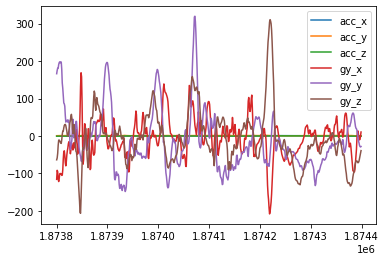

In [40]:
ex=df[df['id']==3123]
ex.iloc[:,2:8].plot()

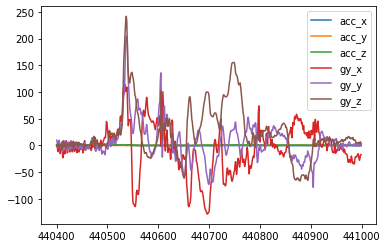

In [44]:
ex=df[df['id']==734]
ex.iloc[:,2:8].plot()

Non-Exercise 인데 데이터 분포가 이렇게 다르다고..?

### 2) Band Pull-Down Row 동작의 흐름 살펴보기

In [46]:
df[df['label']==1]

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,label,label_desc
72600,121,0,0.640598,-0.769199,0.636089,14.942746,32.510663,40.129182,1,Band Pull-Down Row
72601,121,1,0.655655,-0.810453,0.599642,24.803914,22.240559,49.459860,1,Band Pull-Down Row
72602,121,2,0.636468,-0.866491,0.621542,31.280562,20.172610,57.321120,1,Band Pull-Down Row
72603,121,3,0.510725,-0.900305,0.633921,46.846085,25.326565,53.250757,1,Band Pull-Down Row
72604,121,4,0.460270,-0.912396,0.560737,63.922149,46.618421,49.819528,1,Band Pull-Down Row
...,...,...,...,...,...,...,...,...,...,...
1777795,2962,595,0.859059,-0.706300,0.184757,189.294862,30.120133,46.744970,1,Band Pull-Down Row
1777796,2962,596,0.836479,-0.569470,0.273326,200.567124,54.751772,39.662804,1,Band Pull-Down Row
1777797,2962,597,0.762923,-0.576776,0.354858,196.140947,72.874527,35.860743,1,Band Pull-Down Row
1777798,2962,598,0.687885,-0.680597,0.367335,209.204177,84.062538,28.589794,1,Band Pull-Down Row


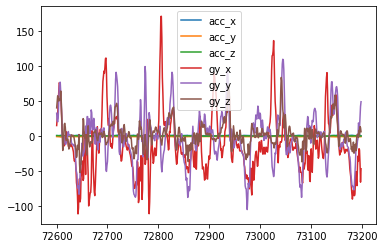

In [47]:
ex=df[df['id']==121]
ex.iloc[:,2:8].plot()

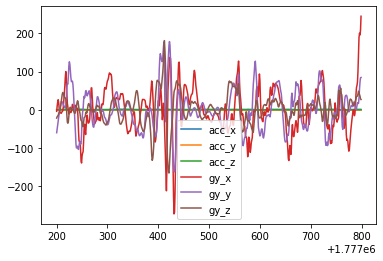

In [48]:
ex=df[df['id']==2962]
ex.iloc[:,2:8].plot()

음.....

## 3. LSTM Baseline

In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [49]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [50]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

In [63]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [51]:
model = Sequential()
model.add(LSTM(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4992      
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dense_1 (Dense)              (None, 61)                7869      
Total params: 17,085
Trainable params: 17,085
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
model.fit(X,y, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 6s 296ms/step - loss: 1.9166 - accuracy: 0.5208 - val_loss: 2.3448 - val_accuracy: 0.5104
Epoch 2/100
20/20 [==============================] - 6s 284ms/step - loss: 1.8974 - accuracy: 0.5204 - val_loss: 2.3444 - val_accuracy: 0.5072
Epoch 3/100
20/20 [==============================] - 6s 284ms/step - loss: 1.8804 - accuracy: 0.5212 - val_loss: 2.3479 - val_accuracy: 0.5088
Epoch 4/100
20/20 [==============================] - 6s 291ms/step - loss: 1.8657 - accuracy: 0.5256 - val_loss: 2.3448 - val_accuracy: 0.5152
Epoch 5/100
20/20 [==============================] - 6s 281ms/step - loss: 1.8523 - accuracy: 0.5260 - val_loss: 2.3382 - val_accuracy: 0.5168
Epoch 6/100
20/20 [==============================] - 6s 291ms/step - loss: 1.8344 - accuracy: 0.5308 - val_loss: 2.3383 - val_accuracy: 0.5104
Epoch 7/100
20/20 [==============================] - 6s 283ms/step - loss: 1.8233 - accuracy: 0.5356 - val_loss: 2.3492 - val_accuracy: 0.5168

In [66]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [67]:
prediction=model.predict(test_X)

In [68]:
prediction.shape

(782, 61)

In [69]:
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,0.002890,0.005766,0.002434,0.000711,0.012364,0.002796,0.028744,0.001276,0.000771,0.027405,0.002505,0.007999,0.000475,0.002250,0.003641,0.001381,0.012085,0.003154,0.000147,0.000531,0.000238,0.001149,0.000856,0.001034,0.006229,0.001216,0.668780,0.001971,0.000064,0.006507,0.015662,0.006889,0.000407,0.003609,0.007467,0.000178,0.001966,0.007551,0.006582,0.001913,0.002490,0.002487,0.006111,0.041972,0.007269,0.016097,0.001387,0.009832,0.002103,0.003666,0.004679,0.004948,0.000229,0.000596,0.014477,0.001171,0.003535,0.008649,0.003405,0.004255,0.001048
1,3126,0.002008,0.022165,0.000330,0.003946,0.019043,0.007013,0.007538,0.009439,0.001487,0.016953,0.006574,0.008289,0.001756,0.006345,0.009625,0.001622,0.003284,0.005267,0.018663,0.001195,0.005726,0.010068,0.009728,0.009562,0.011720,0.007393,0.590659,0.005945,0.000057,0.000151,0.004494,0.003387,0.001816,0.009992,0.003862,0.001924,0.006205,0.009706,0.001507,0.000057,0.018494,0.002260,0.004492,0.010259,0.013637,0.012570,0.003145,0.002330,0.006375,0.005355,0.022197,0.002796,0.002096,0.001249,0.003285,0.001243,0.004510,0.015214,0.003457,0.010420,0.008114
2,3127,0.001676,0.012838,0.000128,0.000095,0.045122,0.005402,0.002421,0.019820,0.003250,0.004203,0.023787,0.013913,0.000414,0.000117,0.004137,0.003935,0.002778,0.014340,0.010218,0.000537,0.002214,0.002275,0.006748,0.000967,0.009724,0.005108,0.626298,0.000294,0.000114,0.001123,0.004433,0.008089,0.000630,0.019272,0.007102,0.000508,0.002378,0.021787,0.001477,0.000101,0.003698,0.000555,0.003804,0.003225,0.005021,0.004139,0.003808,0.009025,0.017591,0.011094,0.024235,0.004680,0.000855,0.000157,0.000355,0.000763,0.001082,0.007215,0.002321,0.004996,0.001611
3,3128,0.000535,0.007970,0.000340,0.002023,0.005962,0.002830,0.001897,0.020077,0.036915,0.014657,0.003314,0.006352,0.004827,0.003724,0.033205,0.000615,0.001531,0.001553,0.001123,0.000135,0.003449,0.003186,0.004611,0.006252,0.007907,0.000801,0.585431,0.002527,0.000595,0.000299,0.001006,0.007472,0.007776,0.014966,0.000665,0.000643,0.000672,0.002523,0.006108,0.000592,0.001316,0.000898,0.001942,0.006040,0.017717,0.012604,0.001473,0.001318,0.030256,0.010749,0.029819,0.007935,0.006199,0.000513,0.003383,0.000269,0.003713,0.006368,0.002607,0.007114,0.040701
4,3129,0.000177,0.001511,0.000024,0.000002,0.001722,0.000287,0.000187,0.000600,0.000829,0.000767,0.003616,0.001023,0.000041,0.000031,0.001212,0.000823,0.000088,0.000922,0.001038,0.000077,0.000205,0.000349,0.000549,0.000222,0.001754,0.000294,0.954690,0.000023,0.000006,0.000020,0.001285,0.000908,0.000162,0.004219,0.001534,0.000340,0.000277,0.002598,0.000022,0.000003,0.000486,0.000048,0.000185,0.001593,0.000260,0.000569,0.001034,0.000357,0.000987,0.002742,0.002830,0.002116,0.000061,0.000011,0.000009,0.000469,0.000063,0.000565,0.000529,0.000332,0.000316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.001534,0.007790,0.001492,0.002271,0.012660,0.010870,0.050481,0.001813,0.000426,0.006997,0.008199,0.004220,0.000263,0.000962,0.000763,0.005548,0.029023,0.010999,0.008675,0.006466,0.008372,0.017618,0.008345,0.011355,0.003315,0.024044,0.424328,0.036032,0.000020,0.000130,0.014259,0.004431,0.000612,0.008797,0.007919,0.005095,0.006168,0.007482,0.000245,0.000369,0.025568,0.001782,0.003764,0.006756,0.001303,0.006309,0.006839,0.014429,0.002528,0.003081,0.051236,0.010235,0.000302,0.002315,0.003006,0.011371,0.009228,0.018043,0.000280,0.059813,0.001422
778,3903,0.005936,0.008875,0.000729,0.000099,0.024757,0.003875,0.002169,0.016070,0.010735,0.010960,0.049152,0.051432,0.005167,0.000400,0.031091,0.011832,0.002564,0.011517,0.015834,0.000717,0.006367,0.013462,0.010136,0.002277,0.021662

In [70]:
submission.iloc[:,1:]=prediction

In [71]:
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,1.765622e-05,3.704826e-07,8.349306e-07,6.888792e-09,0.000128,0.000005,4.862375e-07,0.000001,2.995138e-06,2.213096e-02,0.000063,1.127956e-05,4.090547e-08,1.461226e-04,0.001093,2.396034e-07,0.000002,4.813882e-07,1.260555e-13,1.886137e-10,6.630589e-12,5.925625e-08,6.754848e-07,4.735699e-07,1.136907e-05,3.712393e-08,0.888743,1.788572e-08,7.633284e-06,2.780145e-03,0.008645,0.000030,3.511405e-05,0.000033,6.925806e-07,2.065541e-12,9.723086e-07,2.052692e-06,9.777301e-06,1.934437e-06,2.444019e-07,3.948750e-07,1.354790e-03,0.069975,1.105220e-03,0.001940,5.291480e-09,2.887663e-04,0.000904,0.000066,0.000200,9.942367e-08,1.263506e-09,5.959518e-07,5.450572e-06,3.310630e-08,1.086591e-07,0.000072,3.586957e-05,8.567739e-07,0.000144
1,3126,1.537018e-03,1.265648e-04,8.544780e-06,8.092612e-04,0.011053,0.000265,3.203228e-07,0.000141,1.473195e-06,1.362131e-02,0.026683,2.799676e-02,3.148383e-05,1.152904e-02,0.002715,7.292803e-07,0.000027,7.805364e-06,1.441082e-04,3.164013e-07,7.704565e-05,7.385542e-03,5.072812e-04,2.603273e-02,3.345868e-02,2.312201e-05,0.782566,3.494485e-04,2.068807e-06,4.782347e-08,0.001754,0.000964,2.329933e-03,0.002818,1.608945e-03,9.991155e-06,3.268846e-03,7.259817e-06,5.393817e-05,3.989504e-11,2.577322e-03,3.277052e-05,2.715651e-04,0.000124,1.278913e-04,0.000142,5.160565e-06,6.719944e-07,0.000311,0.021972,0.007351,8.717620e-05,6.686588e-05,1.055249e-04,1.303385e-04,3.676438e-04,2.394222e-05,0.000808,1.242291e-03,4.806746e-06,0.004332
2,3127,3.940658e-05,2.323156e-02,3.566133e-07,1.540966e-09,0.085991,0.002616,2.530058e-04,0.017656,5.639030e-04,1.839536e-03,0.002560,1.076789e-03,1.950568e-07,6.570648e-09,0.001183,9.955168e-06,0.006618,1.074964e-03,7.524167e-05,4.556111e-07,4.535639e-07,1.086187e-07,3.381035e-04,4.854082e-07,2.896394e-04,8.918149e-03,0.519695,2.040510e-05,1.377040e-06,8.896058e-05,0.000058,0.000776,1.320116e-06,0.002377,3.478095e-03,9.246819e-09,2.182740e-05,9.809669e-02,1.303442e-06,1.849977e-06,6.502812e-05,1.366093e-05,8.269863e-05,0.000073,1.429072e-03,0.001819,7.559392e-06,1.184717e-02,0.137328,0.024791,0.038400,3.049522e-05,4.483689e-06,3.812827e-10,1.655835e-08,7.251724e-06,8.722674e-06,0.003643,3.181784e-06,1.301229e-03,0.000189
3,3128,2.985349e-05,8.163963e-07,2.599030e-05,4.152349e-04,0.002016,0.000052,8.764255e-10,0.000031,2.794930e-04,9.905484e-04,0.002602,7.149576e-06,2.245031e-08,3.171433e-05,0.002874,2.385573e-05,0.000198,1.326007e-05,8.268397e-06,8.145150e-09,1.685445e-02,3.553619e-03,2.808701e-02,5.959197e-02,2.857019e-02,5.839275e-07,0.787006,1.330201e-06,2.595697e-08,3.203649e-09,0.000020,0.001205,3.194710e-03,0.032219,9.623591e-05,5.651489e-04,1.789283e-05,6.884111e-08,9.109556e-05,4.047590e-13,1.791871e-04,2.412436e-04,2.081591e-03,0.000047,2.190464e-04,0.000230,9.372535e-03,4.073665e-07,0.000168,0.000487,0.000419,8.364100e-04,9.023098e-06,7.009646e-06,6.334627e-04,2.798666e-06,3.190337e-04,0.000093,1.250279e-02,1.680285e-06,0.001476
4,3129,5.142896e-08,1.612858e-04,2.285014e-10,1.513813e-13,0.000019,0.000006,1.114487e-07,0.000002,3.225917e-06,2.153021e-07,0.000080,2.301450e-06,2.274810e-12,1.633563e-12,0.000004,2.213979e-04,0.000003,5.601595e-06,1.902329e-04,4.621754e-06,5.807038e-08,8.555833e-08,8.633927e-07,7.700056e-06,2.190600e-07,3.701217e-06,0.998014,1.334521e-10,2.087301e-11,5.532301e-10,0.000020,0.000003,4.073302e-09,0.000956,1.103190e-05,3.222475e-05,4.651351e-07,1.350310e-06,6.933672e-15,7.054269e-13,9.125060e-08,2.273485e-06,8.153016e-08,0.000010,3.782714e-08,0.000005,1.640988e-05,1.117361e-07,0.000006,0.000012,0.000100,4.517037e-05,1.506355e-10,3.376848e-12,1.869778e-15,2.236381e-07,2.894229e-08,0.000038,9.629361e-09,8.577475e-06,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [72]:
#점수 2.51951
submission.to_csv('baseline_submission.csv', index=False)